# Consumo de cerveja em São Paulo
---

A cerveja, também chamada popularmente de bera, breja ou cerva, é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeita para praticamente todas as situações, de um *happy hour* para um grande casamento chique. Se você você já está sentindo vontade de "tomar uma", saiba que não está sozinho.

No Brasil, o [consumo anual é de 13 bilhões de litros](https://www.kirinholdings.co.jp/english/news/2017/1221_01.html#table3), o terceiro maior do mundo, mas um consumo *per capita* de "apenas" 60 litros, nos deixando em 31º lugar, muito atrás dos checos, com consumo médio anual de 143,4 litros. Mas, como (em teoria) apenas maiores de idade contribuem este número, podemos assumir que o adulto médio bebe um pouco mais do que isso anualmente.

![Viva a cerveja](https://ultrapop.com.br/wp-content/uploads/2020/02/20191204113437_1200_675_-_cerveja.jpg)

Estamos acostumados a associar cerveja com verão e calor, principalmente por conta das propagandas, mas o que **realmente** influencia o nosso consumo de cerveja? É querendo responder a esta pergunta que os dados deste *dataset* foram coletados. Os dados foram coletados numa área universitária de São Paulo/SP, onde há festas com estudantes com idade entre 18 e 28 anos, em média.


## 1. Definição do Problema

### Objetivo

O objetivo deste dataset é encontrar uma relação entre as variáveis coletadas e o consumo de cerveja.

## 2. Obtenção dos Dados

O dataset está disponível no [Kaggle](kaggle.com) e pode ser acessado por [este link](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo). Os dados estão em um único arquivo (`Consumo_cerveja.csv`).

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# allows to see all columns
pd.options.display.max_columns = None

%matplotlib inline

SEED = 357

In [2]:
beer = pd.read_csv('datasets/Consumo_cerveja.csv')

## 3. Exploração dos Dados

In [3]:
print(f'Variáveis:\t{beer.shape[1]}')
print(f'Entradas:\t{beer.shape[0]}')

Variáveis:	7
Entradas:	941


Porém, ao olharmos mais de perto, vemos que só há várias linhas `NaN`. Podemos nos livrar delas.

In [4]:
beer.sample(5)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
533,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,2015-08-20,"16,2","14,8","19,6",0,0.0,17.655
68,2015-03-10,"23,12","21,2","26,9","9,7",0.0,23.042
591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
806,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# dropping lines full of NaN
beer.dropna(inplace=True)

In [6]:
print(f'Variáveis:\t{beer.shape[1]}')
print(f'Entradas:\t{beer.shape[0]}')

Variáveis:	7
Entradas:	365


### Dicionário de dados

* **Data:** A data do dia observado

* **Temperatura Media (C):** A temperatura média do dia observado

* **Temperatura Minima (C):** A temperatura mínima do dia observado

* **Temperatura Maxima (C):** A temperatura máxima do dia observado

* **Precipitacao (mm):** Chuva acumulada em mm do dia

* **Final de Semana:** Indica se é fim de semana ou meio de semana
    * 1 = Fim de Semana (Sábado e Domingo)
    * 0 = Meio de Semana (Segunda a Sexta)

* **Consumo de cerveja (litros):** Consumo de cerveja no dia


**Quais os tipos de cada variável?**

* Variáveis Numéricas
    * Discretas
        * *Final de Semana*
        * *Data*
    * Contínuas
        * *Temperatura Media (C)*
        * *Temperatura Minima (C)*
        * *Temperatura Maxima (C)*
        * *Precipitacao (mm)*
    * Alvo
        * *Consumo de cerveja (litros)*

In [7]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


Podemos ver que algumas variáveis estão como `object` ao invés de `float` ou `int` e a pontuação é feita com vírgulas ao invés de pontos. Devemos corrigir isso.

In [8]:
# Converting types
beer['Data'] = pd.to_datetime(beer['Data'], format="%Y-%m-%d")
beer['Temperatura Media (C)'] = beer['Temperatura Media (C)'].str.replace(',' ,'.').astype(float)
beer['Temperatura Minima (C)'] = beer['Temperatura Minima (C)'].str.replace(',' ,'.').astype(float)
beer['Temperatura Maxima (C)'] = beer['Temperatura Maxima (C)'].str.replace(',' ,'.').astype(float)
beer['Precipitacao (mm)'] = beer['Precipitacao (mm)'].str.replace(',' ,'.').astype(float)
beer['Final de Semana'] = beer['Final de Semana'].astype(int)
beer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    int32         
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 21.4 KB


Há dados faltantes no nosso *dataset*?

In [9]:
# se if there's any NA
beer.isnull().any()

Data                           False
Temperatura Media (C)          False
Temperatura Minima (C)         False
Temperatura Maxima (C)         False
Precipitacao (mm)              False
Final de Semana                False
Consumo de cerveja (litros)    False
dtype: bool

Qual a distribuição dos dados?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002513EB5ECC8>,
      dtype=object)

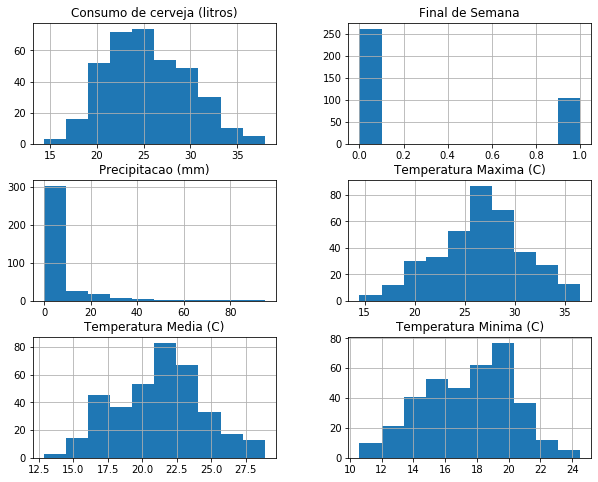

In [10]:
# plotting distribution of numerical data
beer.hist(figsize=(10,8))

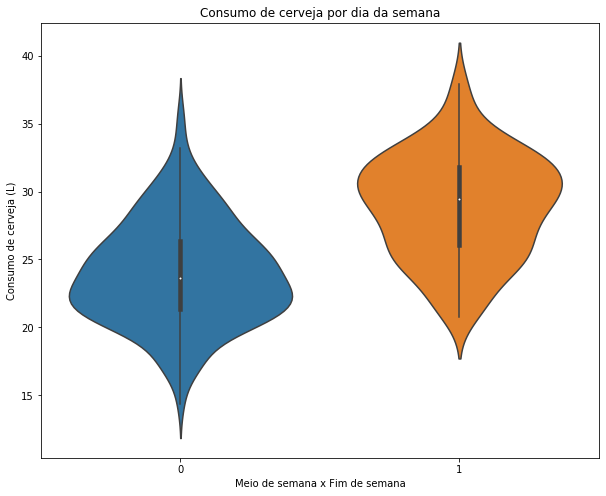

In [11]:
# plotting relation between beer consumption and days of the week
plt.figure(figsize=(10, 8))
sns.violinplot(x='Final de Semana',
               y='Consumo de cerveja (litros)',
               data=beer)
plt.xlabel("Meio de semana x Fim de semana")
plt.ylabel("Consumo de cerveja (L)")
plt.title("Consumo de cerveja por dia da semana")
plt.show()

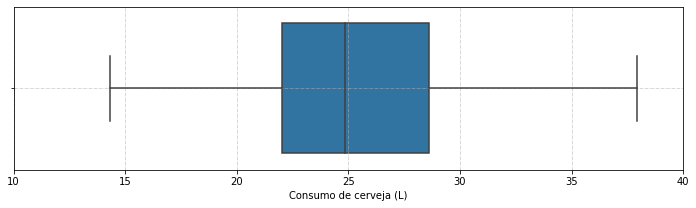

In [12]:
# boxplot of beer consumption
plt.figure(figsize=(12,3))
sns.boxplot(beer['Consumo de cerveja (litros)'])
plt.xlabel('Consumo de cerveja (L)')
plt.xlim(10,40)
plt.grid(ls='-.', lw=.5)

Qual a correlação dos dados?

(6.0, 0.0)

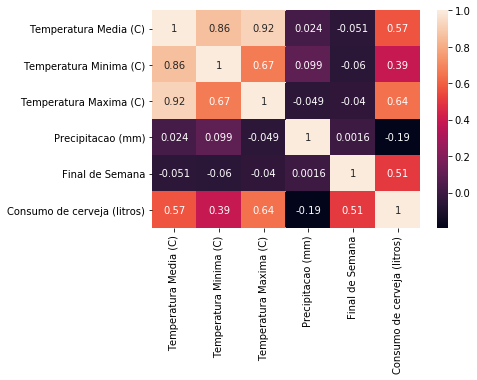

In [13]:
# show correlation heatmap
corr = beer.corr()
ax = sns.heatmap(corr, annot=True)

# to avoid breaking the heatmap on new matplotlib update
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Podemos notar uma correlação considerável entre o consumo de cerveja e a temperatura máxima e com ser fim de semana e uma correlação muito fraca da precipitação com o consumo.

In [14]:
# plotting pie chart of beer consumption each day on weekend and midweek
mid_week = sum(beer[beer['Final de Semana'] == 0]['Consumo de cerveja (litros)']) / 5
week_end = sum(beer[beer['Final de Semana'] == 1]['Consumo de cerveja (litros)']) / 2

labels = ['Meio de semana', 'Fim de semana']
values = [mid_week, week_end]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title='Amostra de consumo diário de cerveja')
fig.show()

In [15]:
mid_week = np.mean(beer[beer['Final de Semana'] == 0]['Consumo de cerveja (litros)'])
week_end = np.mean(beer[beer['Final de Semana'] == 1]['Consumo de cerveja (litros)'])

values = [mid_week, week_end]

fig = go.Figure(data=[go.Bar(x=labels, y=values)])
fig.update_layout(title='Consumo diário médio de cerveja')
fig.show()

In [16]:
# plotting mean consumption of each day of the week

#isoweekday: monday to sunday, 1 to 7
beer["Dia da semana"] = beer["Data"].apply(lambda x: x.isoweekday())

consumo_dias_semana = []
for i in range(1, 8):
    media = np.mean(beer[beer['Dia da semana'] == i]['Consumo de cerveja (litros)'])
    consumo_dias_semana.append(media)

dias_semana = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

fig = go.Figure(data=go.Scatter(x=dias_semana,
                                y=consumo_dias_semana))
fig.update_layout(title='Consumo médio de cerveja a cada dia da semana',
                  xaxis_title='Dia',
                  yaxis_title='Consumo de cerveja (L)')
fig.show()

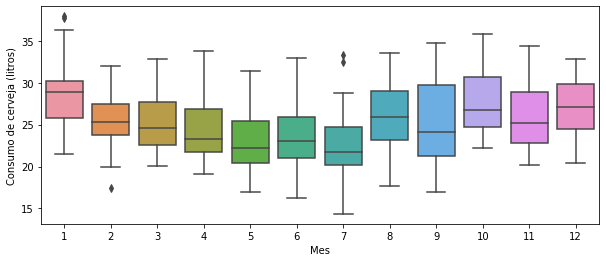

In [17]:
beer['Mes'] = beer['Data'].dt.month

plt.figure(figsize=(10, 4))
sns.boxplot(x=beer['Mes'],
            y=beer['Consumo de cerveja (litros)'])

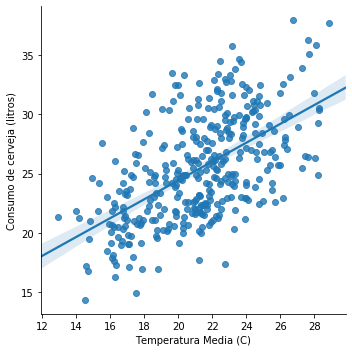

In [18]:
sns.lmplot(x='Temperatura Media (C)',
           y='Consumo de cerveja (litros)',
           data=beer)

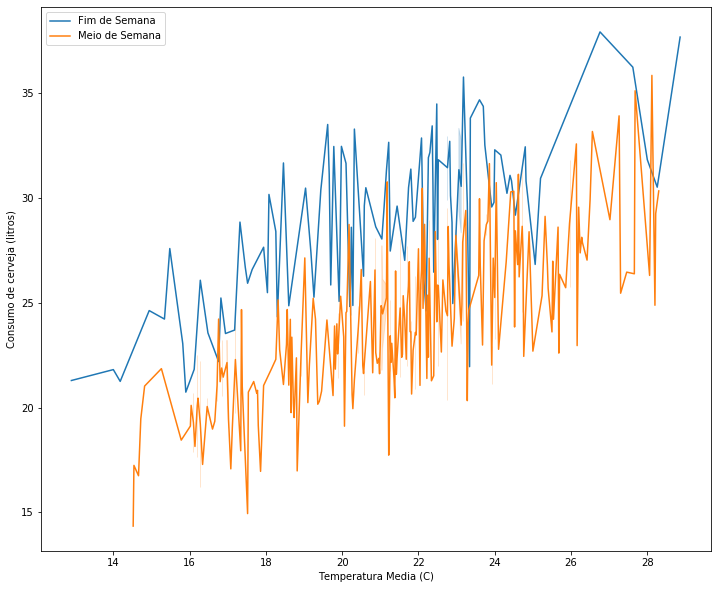

In [19]:
# plotting consumption x meean temperature based on weekday
plt.figure(figsize=(12,10))
sns.lineplot(x='Temperatura Media (C)',
             y='Consumo de cerveja (litros)',
             data=beer[beer['Final de Semana'] == 1],
             label='Fim de Semana')
sns.lineplot(x='Temperatura Media (C)',
             y='Consumo de cerveja (litros)',
             data=beer[beer['Final de Semana'] == 0],
             label='Meio de Semana')


## 4. Preparação dos Dados

Agora que já exploramos as correlações entre os nossos dados, podemos fazer a preparação para o modelo de *machine learning*.

### Selecionar as *features*

In [20]:
# choosing relevant variables
variaveis = ['Temperatura Minima (C)', 'Temperatura Media (C)',
             'Temperatura Maxima (C)', 'Final de Semana']
X = beer[variaveis]
y = beer['Consumo de cerveja (litros)']

X.shape, y.shape

((365, 4), (365,))

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

## 5. Construção do modelo

Usaremos alguns modelos diferentes de *machine learning* e vamos compará-los mais adiante 

In [23]:
# importing machine learning and metrics libraries

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics  import mean_squared_error,r2_score

In [24]:
def mod_info(y_test_, y_hat, mod = 'X'):
    """Return information on the model"""
    
    print(f'''
    {mod}
    
    {"-" * 50}

    Mean squared error | {mean_squared_error(y_test_, y_hat)}
    R^2 score          | {r2_score(y_test_, y_hat)}
    
    {"*" * 50}
    
    y-test std         | {y_test_.std()}
    y-test mean        | {y_test_.mean()}
    
    {"*" * 50}
    
    {mod} y-hat std    | {y_hat.std()}
    {mod} y-hat mean   | {y_hat.mean()}
''')

In [25]:
def make_plot(y, y_hat):
    plt.figure(figsize=(10, 6))    
    
    sns.distplot(y)
    sns.distplot(y_hat)
    plt.legend(['Real','Previsão'])
    plt.grid(ls='-.', lw=0.2, c='k')

In [26]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()


    Linear Regression
    
    --------------------------------------------------

    Mean squared error | 5.616821711928475
    R^2 score          | 0.6966625421292252
    
    **************************************************
    
    y-test std         | 4.3266873663960626
    y-test mean        | 25.255663043478258
    
    **************************************************
    
    Linear Regression y-hat std    | 3.957847913653432
    Linear Regression y-hat mean   | 25.32209941829713



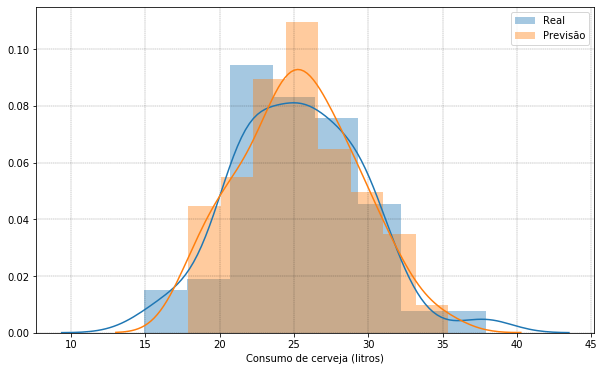

In [27]:
y_hat_lr = model_lr.predict(X_test)

mod_info(y_test, y_hat_lr, 'Linear Regression')
make_plot(y_test, y_hat_lr)

In [28]:
knr = KNeighborsRegressor(n_jobs=-1)
knr.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1)


    K Neighbors Regressor
    
    --------------------------------------------------

    Mean squared error | 9.067953129999996
    R^2 score          | 0.5102835746586072
    
    **************************************************
    
    y-test std         | 4.3266873663960626
    y-test mean        | 25.255663043478258
    
    **************************************************
    
    K Neighbors Regressor y-hat std    | 3.656440746293192
    K Neighbors Regressor y-hat mean   | 25.093356521739132



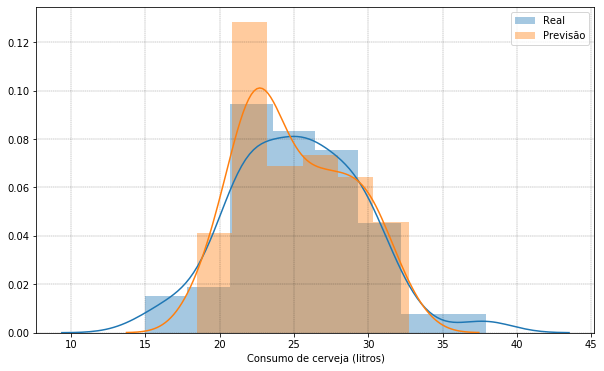

In [29]:
y_hat_knr = knr.predict(X_test)

mod_info(y_test, y_hat_knr, 'K Neighbors Regressor')
make_plot(y_test, y_hat_knr)

In [30]:
mlpr = MLPRegressor(hidden_layer_sizes=(100,100,100,),
                    tol=0.000000001,
                    max_iter=1000)
mlpr.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=1000, tol=1e-09)


    MLP Regressor
    
    --------------------------------------------------

    Mean squared error | 5.840850219724268
    R^2 score          | 0.6845638426278613
    
    **************************************************
    
    y-test std         | 4.3266873663960626
    y-test mean        | 25.255663043478258
    
    **************************************************
    
    MLP Regressor y-hat std    | 4.325274778276601
    MLP Regressor y-hat mean   | 24.99048764654044



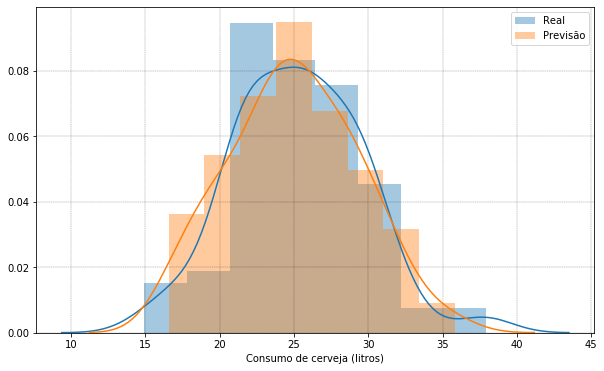

In [31]:
y_hat_mlpr = mlpr.predict(X_test)

mod_info(y_test, y_hat_mlpr, 'MLP Regressor')
make_plot(y_test, y_hat_mlpr)

In [33]:
rfr = RandomForestRegressor(n_estimators=2000,
                            max_depth=7,
                            min_samples_split=6,
                            min_samples_leaf=6,
                            max_features='auto',
                            oob_score=True,
                            n_jobs=-1,
                            random_state=SEED)

rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=6, min_samples_split=6,
                      n_estimators=2000, n_jobs=-1, oob_score=True,
                      random_state=357)


    Random Forest Regressor
    
    --------------------------------------------------

    Mean squared error | 7.781675697335407
    R^2 score          | 0.5797492167160014
    
    **************************************************
    
    y-test std         | 4.3266873663960626
    y-test mean        | 25.255663043478258
    
    **************************************************
    
    Random Forest Regressor y-hat std    | 3.882732465850926
    Random Forest Regressor y-hat mean   | 25.396136221012988



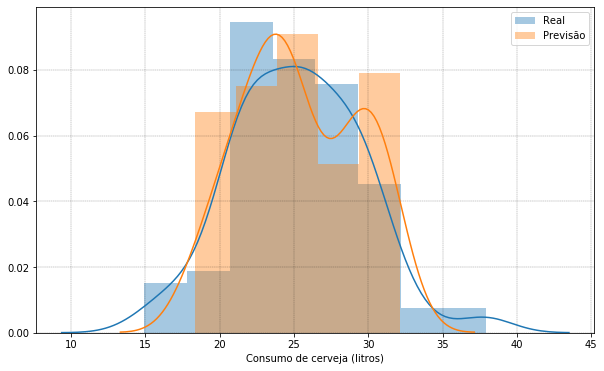

In [34]:
y_hat_rfr = rfr.predict(X_test)

mod_info(y_test, y_hat_rfr, 'Random Forest Regressor')
make_plot(y_test, y_hat_rfr)

## 6. Avaliação

Apesar de ser o modelo mais simples, o modelo de regressão linear apresentou o $R^2$ mais alto de todos, com cerca de 69,67% do consumo sendo explicado pelas variáveis.

**Qual seria o consumo de cerveja previsto para hoje?**

Hoje é sábado, com temperatura máxima de 26º, mínima de 17º e média de 20,6º. 

In [35]:
data = np.array([17.0, 20.6, 26.0, 1]).reshape((1, -1))

print(f"Consumo previsto de cerveja para hoje: {model_lr.predict(data)[0]:.2f} litros")

Consumo previsto de cerveja para hoje: 28.99 litros
